In [1]:
import nltk
from konlpy.corpus import kobill
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
import platform
from wordcloud import WordCloud, STOPWORDS

In [2]:
#韓国語使用のため、韓国語変換コード使用。
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [3]:
plt.rcParams['axes.unicode_minus']=False

In [4]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [5]:
#naver.com から検索後「彼氏に渡すプレゼント」テキストパーシング
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'
response = urlopen(html.format(num=1, key_word=urllib.parse.quote('남친 선물')))
soup = BeautifulSoup(response, "html.parser")
tmp = soup.find_all('dl')

In [6]:
tmp_list = []
for line in tmp : 
    tmp_list.append(line.text)

In [7]:
from tqdm import tqdm_notebook

present_candi_text = []
for n in tqdm_notebook(range(1,10000,10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('남자친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')

    for line in tmp : 
        present_candi_text.append(line.text)
    time.sleep(0.5)

In [8]:
import nltk
from konlpy.tag import Twitter; t = Twitter()

In [9]:
present_text =''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line +'\n'

In [10]:
tokens_ko = t.morphs(present_text)

In [11]:
ko = nltk.Text(tokens_ko, name = '남자친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

659947
445


In [12]:
#形態素分析道具を使ったワード抽出
ko = nltk.Text(tokens_ko, name = '남자친구 선물')
ko.vocab().most_common(100)

[('선물', 39995),
 ('남자친구', 33071),
 ('.', 20772),
 ('대', 13077),
 ('...', 10767),
 (',', 9999),
 ('로', 9229),
 ('질문', 8460),
 ('답변', 7691),
 ('닉네임', 7691),
 ('이', 7690),
 ('추천', 7690),
 ('30', 6921),
 ('생일', 6152),
 ('가', 5384),
 ('요', 5383),
 ('에', 5383),
 ('-', 5383),
 ('?', 4615),
 ('군대', 4614),
 ('단어', 3850),
 ('20', 3849),
 ('/', 3846),
 ('군인', 3845),
 ('검색', 3080),
 ('하는', 3079),
 ('의', 3079),
 ('때', 3078),
 ('는', 3078),
 ('적', 3077),
 ('을', 3077),
 ('들', 3077),
 ('좀', 3076),
 ('준비', 3076),
 ('제', 3076),
 ('건강', 3076),
 ('생각', 3076),
 ('중', 3076),
 ('실용', 3076),
 ('입력', 2310),
 ('를', 2309),
 ('분', 2309),
 ('한', 2308),
 ('있으면', 2308),
 ('지갑', 2308),
 ('인', 2308),
 ('이번', 2308),
 ('안녕하세요', 2308),
 ('해', 2307),
 ('남친', 2307),
 ('기념일', 2307),
 ('나', 2307),
 ('****', 2307),
 ('ㅠㅠ', 2307),
 ('케이스', 2307),
 ('발렌타인데이', 2307),
 ('포함', 1540),
 ('에는', 1540),
 ('피트니스', 1540),
 ('조', 1540),
 ('여러', 1539),
 ('개', 1539),
 ('은', 1539),
 ('2020.06', 1539),
 ('도움', 1539),
 ('신발', 1539),
 ('등', 1539

In [13]:
#除外単語設定
stop_words = ['.','은','는','이','가','질문','제','를','이','도','의','중','고','초반','가','요','보','이','까','뭐',
              '인데','답변','ㅠㅠ','도','좋','로','으로','것','다','니다','광고','때','겠','선물',',','/','(',')','!',
              '척','을','를','핸드폰','안녕하세요','?','생일','추천','부탁','니다.','20','30','직장인','...','-','대',
              '에','검색','들','하는','좀','있으면','이번','참고','바랍니다','전','남자친구','닉네임','군대','단어','적',
              '준비', '입력', '분', '한', '인', '해', '나', '포함', '에는', '조', '여러', '개', '도움', '등', '같은',
              '하시기', '하려고', '해서요', '부담', '씨', '슬', '했는데', '했어요', '간', '좋아', '하는', '처럼', '군인',
              '곰', '냥', '곰신', '검색어', '연관', '경향', '위주', '분위기', '맛집', '01', '02', '되는', '됩니다', '훈련소',
              '기념일','인기','브랜드','제품','2020.06','~']
tokens_ko = [each_word for each_word in tokens_ko if each_word not in stop_words]
ko = nltk.Text(tokens_ko, name='남자친구 선물')
ko.vocab().most_common(50)

[('건강', 3076),
 ('생각', 3076),
 ('실용', 3076),
 ('지갑', 2308),
 ('남친', 2307),
 ('****', 2307),
 ('케이스', 2307),
 ('발렌타인데이', 2307),
 ('피트니스', 1540),
 ('신발', 1539),
 ('보조', 1538),
 ('밀크', 1538),
 ('저', 1538),
 ('있는데', 1538),
 ('살', 1538),
 ('2', 1538),
 ('어떤', 1538),
 ('이고', 1538),
 ('누구', 1538),
 ('한다고', 1538),
 ('300일', 1538),
 ('2020.05', 1538),
 ('로션', 1538),
 ('베스트', 1538),
 ('7', 1538),
 ('연관검색어', 1538),
 ('10', 1538),
 ('기본', 770),
 ('하나', 770),
 ('이상', 770),
 ('된', 770),
 ('문서', 770),
 ('상세', 770),
 ('정확히', 770),
 ('일치', 770),
 ('문장', 770),
 ('("', 770),
 ('")', 770),
 ('반드시', 770),
 ('(+)', 770),
 ('제외', 770),
 ('(-)', 770),
 ('기', 770),
 ('본', 770),
 ('결과', 770),
 ('범위', 770),
 ('줄이고자', 770),
 ('할', 770),
 ('사용', 770),
 ('합니다', 770)]

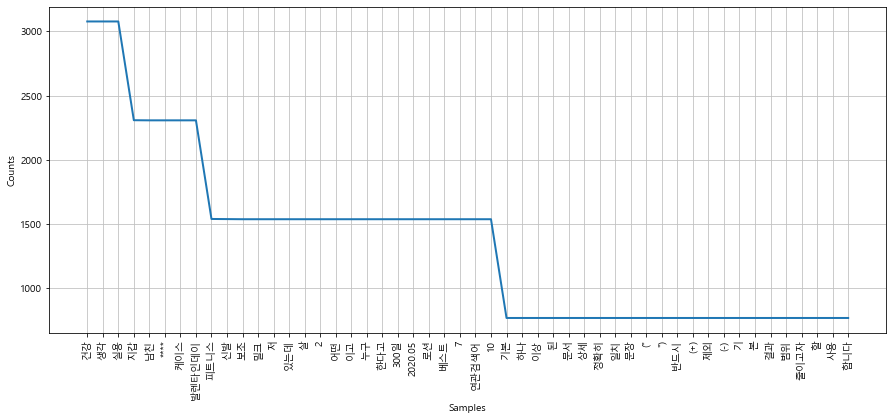

In [14]:
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [15]:
import gensim
from gensim.models import word2vec

In [16]:
twitter = Twitter()
results = []
lines = present_candi_text

for line in tqdm_notebook(lines):
    malist = twitter.pos(line, norm=True, stem = True)
    r = []

    for word in malist:
        if not word[1] in ["Josa", "Eomi", "Punctuation"]:
            r.append(word[0])
    r1 = (" ".join(r)).strip()
    results.append(r1)
    print(r1)

구 선물 하다 해 2020.06 01 30 대다 남자친구 선물 하다 해 이번 남자친구 승진 하다 ㅎㅎ 그런데 좀 있다 남자친구 생일 요 생일 때 남친 따로 뭐 주다 부담 되다 답변 30 대다 남자친구 선물 준비 하다 보다 색다르다 방향 제 같다 디 퓨저 선물 해보다 나쁘다 않다 같다 닉네임 척척 박사
질문 남자친구 선물 건강 보조 제 7일 전 지인 들 남자친구 선물 밀크 씨 슬 많이 알아보다 있다 회식 많다 피곤하다 하다 남자친구 선물 딱이다 것 같다 정말 꼭 주다 생각 들다 남자친구 선물 답변 남자친구 선물 건강 보조 제 알아보다 밀크 씨 슬 좋다 피곤하다 하다 간 해독 좋다 그리고 간 건강 도움 주다 실리 마린 성분 외 필요하다 영양소 들 닉네임 건강 도우미
질문 남자친구 선물 2020.01 06 안녕하다 저 중 3 여학생 이다 남자친구 있다 한 살 연하 중 2 근데 기념일 날 선물 하다 어떻다 선물 나다 답변 남자친구 기념일 선물 무드미 달 무드등 어떻다 학생 구매 하다 부담 않다 가격 대의 제품 남녀 노소 누구 좋아하다 리얼 보름달 디자인 닉네임 무 드미
질문 30 대 남자친구 선물 마땅하다 생각 안나 2020.04 25 30 대 남자친구 선물 준비 중 서프라이즈 주다 여태 매번 받다 너무 많다 더 신경 쓰이다 좀 실용 적 30 대 남자친구 선물 주다 뭐 답변 30 대 남자친구 선물 실용 적 준비 하다 하다 기초 화장품 세트 쪽 어떻다 요 남자라면 누구 다 필요하다 때문 받다 때 무조건 실용 성은 닉네임 cd 73
질문 남자친구 300일 선물 추천 좀 햐주 2020.03 21 남자친구 300일 선물 추천 좀 햐주세 ㅠㅠ 웬만하다 다 선물 하다 딱하다 하다 없다 ㅠ 답변 남자친구 선물 마리오 케이스 추천 해드리다 실용 적 커플 케이스 도 싸다 여러 개 사도 괜찮다 젤리 하드 악세사리 에어팟 케이스 키링 등 이 것 이쁘다 닉네임 비건 물주
질문 남자친구 생일 선물 2020.05 11 중 2 남자친구 생일 선물 3만원 안 추천 하다 줄다 ㅠㅠ 시계 향수 로션

In [24]:
data_file = 'pres_boy.data'
with open(data_file, 'w', encoding='utf-8') as fp:
    fp.write("\n".join(results))

In [25]:
data = word2vec.LineSentence(data_file)
model = word2vec.Word2Vec(data, size=200, window=10, hs=1, min_count=2, sg=1)
model.save('pres_boy.model')

In [26]:
model = word2vec.Word2Vec.load("pres_boy.model")

In [28]:
#gensimを使った相関関係分析。プレゼント定番の香水との相関性測定。
model.most_similar(positive=['남자친구','향수'])

[('시계', 0.6719741821289062),
 ('선물', 0.615800142288208),
 ('줄다', 0.6043118834495544),
 ('안', 0.5960721373558044),
 ('센스', 0.5830562710762024),
 ('3만원', 0.5696885585784912),
 ('감동', 0.5619849562644958),
 ('시키다', 0.5234434604644775),
 ('11', 0.45737940073013306),
 ('비교', 0.44642388820648193)]

ｷｰﾜｰﾄﾞ「彼氏」と「香水」の分析結果、「プレゼント」というｷｰﾜｰﾄﾞと六割の相関関係を見せた。
他に「時計」は上記のｷｰﾜｰﾄﾞと弱七割の相関性を見せている。彼氏に渡す定番のプレゼントと言える.